In [19]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
data_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BigData_Analysis/10장 자동차연비분석/auto-mpg.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
print('데이터셋 크기: ',data_df.shape)
data_df.head()

데이터셋 크기:  (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [21]:
data_df = data_df.drop(['car_name', 'origin', 'horsepower'], axis=1, inplace=False)
data_df.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [22]:
print('테이터셋 크기: ', data_df.shape)

테이터셋 크기:  (398, 6)


In [23]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#X, Y 분할하기
Y = data_df['mpg']
X = data_df.drop(['mpg'], axis=1, inplace=False)

#훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#선형 회귀 분석 : 모델 생성
lr = LinearRegression()

#선형 회귀 분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [27]:
#선형 회귀 분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 12.278, RMSE : 3.504
R^2(Variance score) : 0.808


In [28]:
print('Y 절편 값: ', np.round(lr.intercept_, 2))
print('회귀 계수 값: ', np.round(lr.coef_, 2))

Y 절편 값:  -17.55
회귀 계수 값:  [-0.14  0.01 -0.01  0.2   0.76]


In [29]:
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)
coef.sort_values(ascending=False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

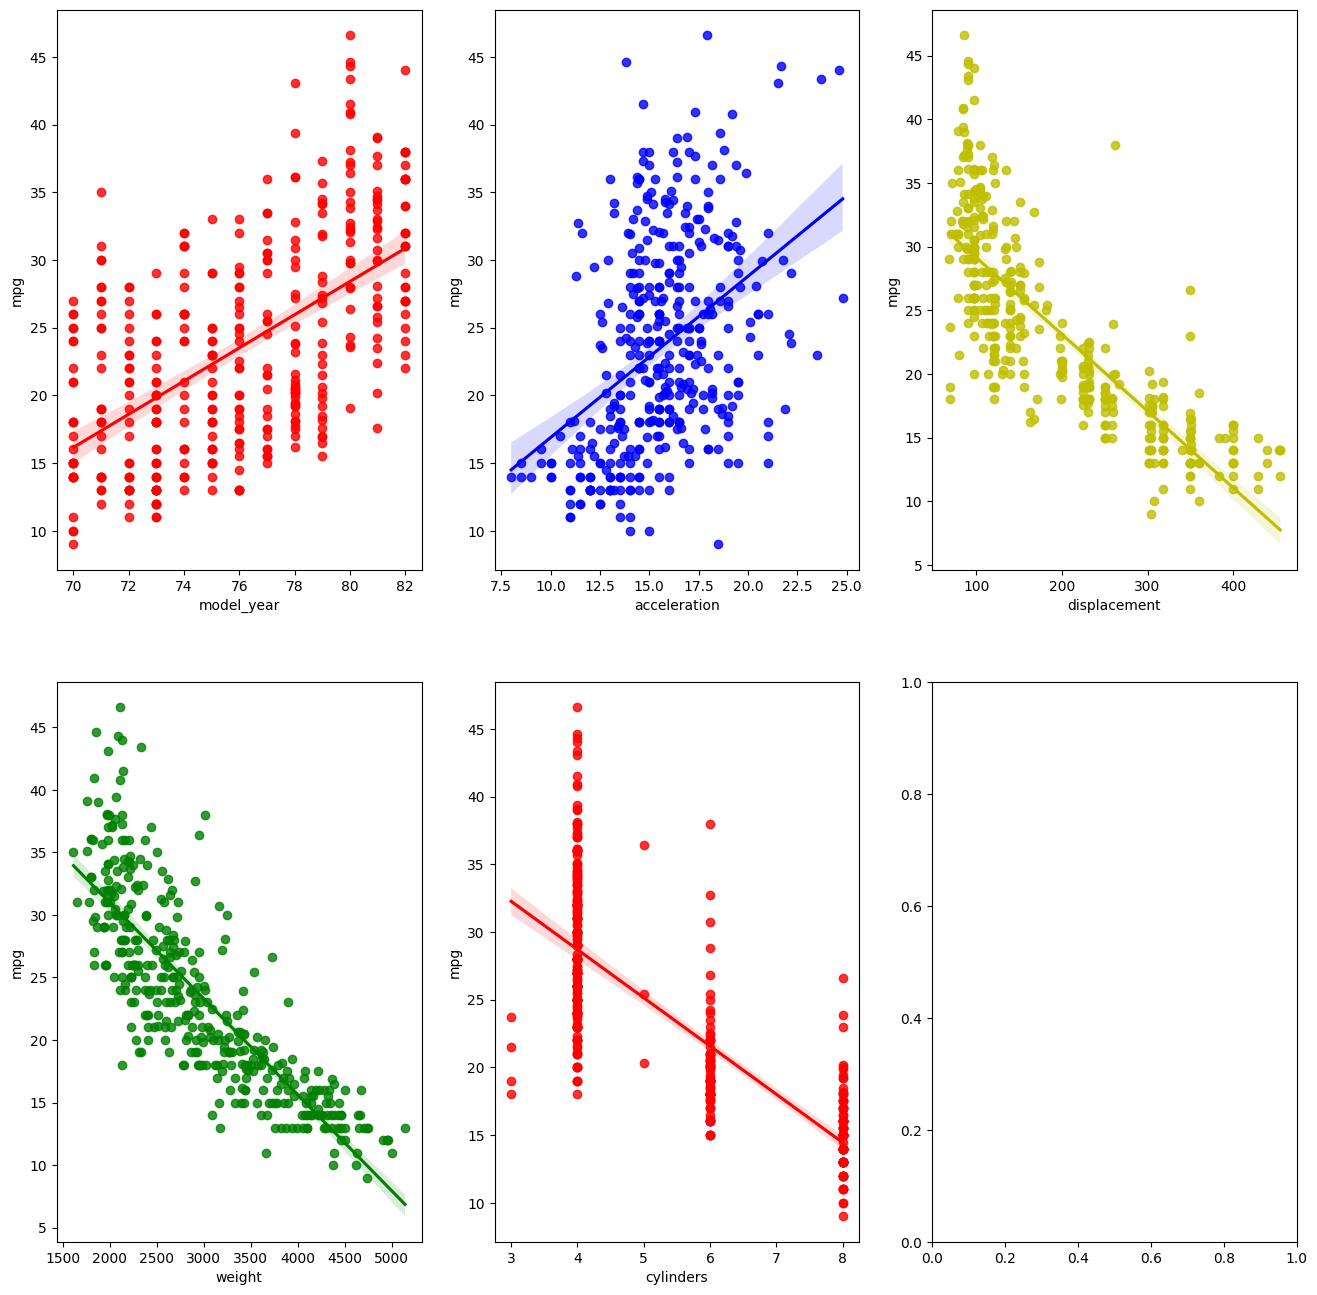

In [30]:
#시각화
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(figsize=(16, 16), ncols=3, nrows=2)
x_features = ['model_year', 'acceleration', 'displacement', 'weight', 'cylinders']
plot_color = ['r', 'b', 'y', 'g', 'r']
for i, feature in enumerate(x_features):
  row = int(i/3)
  col = i%3
  sns.regplot(x=feature, y='mpg', data=data_df, ax=axs[row][col], color=plot_color[i])

In [31]:
#임의의 데이터로 연비 예측하기
print("연비를 예측하고 싶은 차의 정보를 입력해주세요.")

cylinders_1 = int(input("cylinders : "))
displacement_1 = int(input("displacement : "))
weight_1 = int(input("weight : "))
acceleration_1 = int(input("acceleration : "))
model_year_1 = int(input("model_year : "))

mpg_predict = lr.predict([[cylinders_1, displacement_1, weight_1, acceleration_1, model_year_1]])
print("이 자동차의 예상 연비(MPG)는 %.2f입니다."%mpg_predict)

연비를 예측하고 싶은 차의 정보를 입력해주세요.
cylinders : 8
displacement : 350
weight : 3200
acceleration : 22
model_year : 99
이 자동차의 예상 연비(MPG)는 41.32입니다.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
<ipython-input-31-cf721108df14>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("이 자동차의 예상 연비(MPG)는 %.2f입니다."%mpg_predict)
